In [63]:
#모듈 임포트
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

#랜덤 시드 배정
np.random.seed(3)
tf.random.set_seed(3)

#CSV 데이터 읽어오기
df_pre = pd.read_csv('wine.csv',header = None)
df = df_pre.sample(frac = 0.15)

#CSV 데이터 확인
print(df.shape)
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [51]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [52]:
#모델 구조 생성
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/this_one{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 100)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=1500, batch_size=500, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/1500
2/2 [==============================] - 1s 192ms/step - loss: 0.4297 - accuracy: 0.7924 - val_loss: 0.3631 - val_accuracy: 0.8253

Epoch 00001: val_loss improved from inf to 0.36314, saving model to ./model\this_one01-0.3631.hdf5
Epoch 2/1500
2/2 [==============================] - 0s 57ms/step - loss: 0.3997 - accuracy: 0.8262 - val_loss: 0.3640 - val_accuracy: 0.8313

Epoch 00002: val_loss did not improve from 0.36314
Epoch 3/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.3941 - accuracy: 0.8372 - val_loss: 0.3276 - val_accuracy: 0.8614

Epoch 00003: val_loss improved from 0.36314 to 0.32760, saving model to ./model\this_one03-0.3276.hdf5
Epoch 4/1500
2/2 [==============================] - 0s 49ms/step - loss: 0.3370 - accuracy: 0.8871 - val_loss: 0.3286 - val_accuracy: 0.9096

Epoch 00004: val_loss did not improve from 0.32760
Epoch 5/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.3566 - accuracy: 0.8928 - val_loss: 0.3077 - val_acc

2/2 [==============================] - 0s 43ms/step - loss: 0.2156 - accuracy: 0.9253 - val_loss: 0.1960 - val_accuracy: 0.9277

Epoch 00073: val_loss improved from 0.19831 to 0.19602, saving model to ./model\this_one73-0.1960.hdf5
Epoch 74/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.2108 - accuracy: 0.9223 - val_loss: 0.1985 - val_accuracy: 0.9337

Epoch 00074: val_loss did not improve from 0.19602
Epoch 75/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.2033 - accuracy: 0.9206 - val_loss: 0.1989 - val_accuracy: 0.9277

Epoch 00075: val_loss did not improve from 0.19602
Epoch 76/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.2090 - accuracy: 0.9216 - val_loss: 0.1957 - val_accuracy: 0.9337

Epoch 00076: val_loss improved from 0.19602 to 0.19571, saving model to ./model\this_one76-0.1957.hdf5
Epoch 77/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.2072 - accuracy: 0.9230 - val_loss: 0.1953 - val_accuracy:

2/2 [==============================] - 0s 41ms/step - loss: 0.1835 - accuracy: 0.9310 - val_loss: 0.1683 - val_accuracy: 0.9458

Epoch 00149: val_loss did not improve from 0.16642
Epoch 150/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.1736 - accuracy: 0.9324 - val_loss: 0.1700 - val_accuracy: 0.9337

Epoch 00150: val_loss did not improve from 0.16642
Epoch 151/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1736 - accuracy: 0.9344 - val_loss: 0.1731 - val_accuracy: 0.9398

Epoch 00151: val_loss did not improve from 0.16642
Epoch 152/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.1653 - accuracy: 0.9353 - val_loss: 0.1764 - val_accuracy: 0.9398

Epoch 00152: val_loss did not improve from 0.16642
Epoch 153/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.1729 - accuracy: 0.9347 - val_loss: 0.1777 - val_accuracy: 0.9458

Epoch 00153: val_loss did not improve from 0.16642
Epoch 154/1500
2/2 [====================

2/2 [==============================] - 0s 40ms/step - loss: 0.1483 - accuracy: 0.9491 - val_loss: 0.1425 - val_accuracy: 0.9518

Epoch 00227: val_loss improved from 0.14399 to 0.14255, saving model to ./model\this_one227-0.1425.hdf5
Epoch 228/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1434 - accuracy: 0.9454 - val_loss: 0.1408 - val_accuracy: 0.9518

Epoch 00228: val_loss improved from 0.14255 to 0.14081, saving model to ./model\this_one228-0.1408.hdf5
Epoch 229/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.1494 - accuracy: 0.9431 - val_loss: 0.1406 - val_accuracy: 0.9578

Epoch 00229: val_loss improved from 0.14081 to 0.14059, saving model to ./model\this_one229-0.1406.hdf5
Epoch 230/1500
2/2 [==============================] - 0s 58ms/step - loss: 0.1446 - accuracy: 0.9504 - val_loss: 0.1407 - val_accuracy: 0.9578

Epoch 00230: val_loss did not improve from 0.14059
Epoch 231/1500
2/2 [==============================] - 0s 48ms/step - loss: 0


Epoch 00305: val_loss did not improve from 0.12391
Epoch 306/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.1281 - accuracy: 0.9504 - val_loss: 0.1311 - val_accuracy: 0.9699

Epoch 00306: val_loss did not improve from 0.12391
Epoch 307/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1249 - accuracy: 0.9575 - val_loss: 0.1281 - val_accuracy: 0.9699

Epoch 00307: val_loss did not improve from 0.12391
Epoch 308/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.1223 - accuracy: 0.9578 - val_loss: 0.1247 - val_accuracy: 0.9699

Epoch 00308: val_loss did not improve from 0.12391
Epoch 309/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1272 - accuracy: 0.9558 - val_loss: 0.1224 - val_accuracy: 0.9699

Epoch 00309: val_loss improved from 0.12391 to 0.12244, saving model to ./model\this_one309-0.1224.hdf5
Epoch 310/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.1241 - accuracy: 0.9531 - val_loss: 0.

2/2 [==============================] - 0s 48ms/step - loss: 0.1206 - accuracy: 0.9508 - val_loss: 0.1224 - val_accuracy: 0.9759

Epoch 00345: val_loss did not improve from 0.11394
Epoch 346/1500
2/2 [==============================] - 0s 43ms/step - loss: 0.1188 - accuracy: 0.9568 - val_loss: 0.1263 - val_accuracy: 0.9759

Epoch 00346: val_loss did not improve from 0.11394
Epoch 347/1500
2/2 [==============================] - 0s 50ms/step - loss: 0.1166 - accuracy: 0.9591 - val_loss: 0.1156 - val_accuracy: 0.9699

Epoch 00347: val_loss did not improve from 0.11394
Epoch 348/1500
2/2 [==============================] - 0s 52ms/step - loss: 0.1178 - accuracy: 0.9538 - val_loss: 0.1138 - val_accuracy: 0.9699

Epoch 00348: val_loss improved from 0.11394 to 0.11380, saving model to ./model\this_one348-0.1138.hdf5
Epoch 349/1500
2/2 [==============================] - 0s 47ms/step - loss: 0.1189 - accuracy: 0.9538 - val_loss: 0.1156 - val_accuracy: 0.9699

Epoch 00349: val_loss did not improve 


Epoch 00385: val_loss improved from 0.10638 to 0.10582, saving model to ./model\this_one385-0.1058.hdf5
Epoch 386/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.1106 - accuracy: 0.9588 - val_loss: 0.1070 - val_accuracy: 0.9699

Epoch 00386: val_loss did not improve from 0.10582
Epoch 387/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.1055 - accuracy: 0.9655 - val_loss: 0.1055 - val_accuracy: 0.9699

Epoch 00387: val_loss improved from 0.10582 to 0.10549, saving model to ./model\this_one387-0.1055.hdf5
Epoch 388/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.1113 - accuracy: 0.9592 - val_loss: 0.1049 - val_accuracy: 0.9699

Epoch 00388: val_loss improved from 0.10549 to 0.10492, saving model to ./model\this_one388-0.1049.hdf5
Epoch 389/1500
2/2 [==============================] - 0s 43ms/step - loss: 0.1073 - accuracy: 0.9585 - val_loss: 0.1096 - val_accuracy: 0.9699

Epoch 00389: val_loss did not improve from 0.10492
Epoch 390


Epoch 00425: val_loss improved from 0.10224 to 0.09998, saving model to ./model\this_one425-0.1000.hdf5
Epoch 426/1500
2/2 [==============================] - 0s 47ms/step - loss: 0.1009 - accuracy: 0.9588 - val_loss: 0.1019 - val_accuracy: 0.9699

Epoch 00426: val_loss did not improve from 0.09998
Epoch 427/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.0969 - accuracy: 0.9628 - val_loss: 0.1216 - val_accuracy: 0.9699

Epoch 00427: val_loss did not improve from 0.09998
Epoch 428/1500
2/2 [==============================] - 0s 42ms/step - loss: 0.1046 - accuracy: 0.9715 - val_loss: 0.1109 - val_accuracy: 0.9639

Epoch 00428: val_loss did not improve from 0.09998
Epoch 429/1500
2/2 [==============================] - 0s 43ms/step - loss: 0.0990 - accuracy: 0.9628 - val_loss: 0.1054 - val_accuracy: 0.9699

Epoch 00429: val_loss did not improve from 0.09998
Epoch 430/1500
2/2 [==============================] - 0s 41ms/step - loss: 0.1000 - accuracy: 0.9591 - val_loss: 0.

2/2 [==============================] - 0s 36ms/step - loss: 0.0847 - accuracy: 0.9692 - val_loss: 0.0931 - val_accuracy: 0.9699

Epoch 00507: val_loss did not improve from 0.09162
Epoch 508/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0859 - accuracy: 0.9689 - val_loss: 0.0946 - val_accuracy: 0.9699

Epoch 00508: val_loss did not improve from 0.09162
Epoch 509/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0827 - accuracy: 0.9699 - val_loss: 0.1041 - val_accuracy: 0.9759

Epoch 00509: val_loss did not improve from 0.09162
Epoch 510/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0884 - accuracy: 0.9769 - val_loss: 0.0951 - val_accuracy: 0.9759

Epoch 00510: val_loss did not improve from 0.09162
Epoch 511/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0865 - accuracy: 0.9719 - val_loss: 0.0894 - val_accuracy: 0.9759

Epoch 00511: val_loss improved from 0.09162 to 0.08944, saving model to ./model\this_one511

2/2 [==============================] - 0s 38ms/step - loss: 0.0868 - accuracy: 0.9672 - val_loss: 0.0888 - val_accuracy: 0.9759

Epoch 00548: val_loss did not improve from 0.08503
Epoch 549/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0802 - accuracy: 0.9735 - val_loss: 0.0893 - val_accuracy: 0.9819

Epoch 00549: val_loss did not improve from 0.08503
Epoch 550/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0820 - accuracy: 0.9729 - val_loss: 0.0879 - val_accuracy: 0.9819

Epoch 00550: val_loss did not improve from 0.08503
Epoch 551/1500
2/2 [==============================] - 0s 44ms/step - loss: 0.0785 - accuracy: 0.9742 - val_loss: 0.0885 - val_accuracy: 0.9759

Epoch 00551: val_loss did not improve from 0.08503
Epoch 552/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0831 - accuracy: 0.9705 - val_loss: 0.0941 - val_accuracy: 0.9699

Epoch 00552: val_loss did not improve from 0.08503
Epoch 553/1500
2/2 [====================

2/2 [==============================] - 0s 41ms/step - loss: 0.0715 - accuracy: 0.9755 - val_loss: 0.0828 - val_accuracy: 0.9819

Epoch 00589: val_loss did not improve from 0.08113
Epoch 590/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.0695 - accuracy: 0.9779 - val_loss: 0.0834 - val_accuracy: 0.9880

Epoch 00590: val_loss did not improve from 0.08113
Epoch 591/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.0715 - accuracy: 0.9759 - val_loss: 0.0898 - val_accuracy: 0.9819

Epoch 00591: val_loss did not improve from 0.08113
Epoch 592/1500
2/2 [==============================] - 0s 57ms/step - loss: 0.0737 - accuracy: 0.9752 - val_loss: 0.0898 - val_accuracy: 0.9699

Epoch 00592: val_loss did not improve from 0.08113
Epoch 593/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.0864 - val_accuracy: 0.9759

Epoch 00593: val_loss did not improve from 0.08113
Epoch 594/1500
2/2 [====================

2/2 [==============================] - 0s 38ms/step - loss: 0.0615 - accuracy: 0.9859 - val_loss: 0.0747 - val_accuracy: 0.9819

Epoch 00671: val_loss did not improve from 0.06866
Epoch 672/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0621 - accuracy: 0.9742 - val_loss: 0.0771 - val_accuracy: 0.9819

Epoch 00672: val_loss did not improve from 0.06866
Epoch 673/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0618 - accuracy: 0.9715 - val_loss: 0.0950 - val_accuracy: 0.9759

Epoch 00673: val_loss did not improve from 0.06866
Epoch 674/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0623 - accuracy: 0.9836 - val_loss: 0.0911 - val_accuracy: 0.9759

Epoch 00674: val_loss did not improve from 0.06866
Epoch 675/1500
2/2 [==============================] - 0s 39ms/step - loss: 0.0589 - accuracy: 0.9843 - val_loss: 0.0733 - val_accuracy: 0.9819

Epoch 00675: val_loss did not improve from 0.06866
Epoch 676/1500
2/2 [====================

2/2 [==============================] - 0s 40ms/step - loss: 0.0530 - accuracy: 0.9792 - val_loss: 0.0708 - val_accuracy: 0.9759

Epoch 00754: val_loss did not improve from 0.06638
Epoch 755/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.0493 - accuracy: 0.9809 - val_loss: 0.0778 - val_accuracy: 0.9699

Epoch 00755: val_loss did not improve from 0.06638
Epoch 756/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0464 - accuracy: 0.9879 - val_loss: 0.0743 - val_accuracy: 0.9759

Epoch 00756: val_loss did not improve from 0.06638
Epoch 757/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.0523 - accuracy: 0.9856 - val_loss: 0.0693 - val_accuracy: 0.9759

Epoch 00757: val_loss did not improve from 0.06638
Epoch 758/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.0526 - accuracy: 0.9789 - val_loss: 0.0738 - val_accuracy: 0.9759

Epoch 00758: val_loss did not improve from 0.06638
Epoch 759/1500
2/2 [====================

2/2 [==============================] - 0s 32ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0930 - val_accuracy: 0.9759

Epoch 00796: val_loss did not improve from 0.06335
Epoch 797/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.0477 - accuracy: 0.9883 - val_loss: 0.0704 - val_accuracy: 0.9819

Epoch 00797: val_loss did not improve from 0.06335
Epoch 798/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.0624 - val_accuracy: 0.9880

Epoch 00798: val_loss improved from 0.06335 to 0.06239, saving model to ./model\this_one798-0.0624.hdf5
Epoch 799/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.0470 - accuracy: 0.9832 - val_loss: 0.0726 - val_accuracy: 0.9819

Epoch 00799: val_loss did not improve from 0.06239
Epoch 800/1500
2/2 [==============================] - 0s 36ms/step - loss: 0.0452 - accuracy: 0.9886 - val_loss: 0.0840 - val_accuracy: 0.9759

Epoch 00800: val_loss did not improve 


Epoch 00837: val_loss did not improve from 0.06037
Epoch 838/1500
2/2 [==============================] - 0s 37ms/step - loss: 0.0676 - accuracy: 0.9762 - val_loss: 0.0554 - val_accuracy: 0.9880

Epoch 00838: val_loss improved from 0.06037 to 0.05538, saving model to ./model\this_one838-0.0554.hdf5
Epoch 839/1500
2/2 [==============================] - 0s 40ms/step - loss: 0.0536 - accuracy: 0.9789 - val_loss: 0.0858 - val_accuracy: 0.9880

Epoch 00839: val_loss did not improve from 0.05538
Epoch 840/1500
2/2 [==============================] - 0s 38ms/step - loss: 0.0547 - accuracy: 0.9859 - val_loss: 0.0638 - val_accuracy: 0.9819

Epoch 00840: val_loss did not improve from 0.05538
Epoch 841/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0636 - val_accuracy: 0.9759

Epoch 00841: val_loss did not improve from 0.05538
Epoch 842/1500
2/2 [==============================] - 0s 31ms/step - loss: 0.0455 - accuracy: 0.9806 - val_loss: 0.

2/2 [==============================] - 0s 34ms/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.0667 - val_accuracy: 0.9699

Epoch 00921: val_loss did not improve from 0.05538
Epoch 922/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0479 - accuracy: 0.9839 - val_loss: 0.0687 - val_accuracy: 0.9699

Epoch 00922: val_loss did not improve from 0.05538
Epoch 923/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.0428 - accuracy: 0.9836 - val_loss: 0.0739 - val_accuracy: 0.9699

Epoch 00923: val_loss did not improve from 0.05538
Epoch 924/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.0387 - accuracy: 0.9923 - val_loss: 0.0650 - val_accuracy: 0.9759

Epoch 00924: val_loss did not improve from 0.05538
Epoch 925/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.0394 - accuracy: 0.9866 - val_loss: 0.0574 - val_accuracy: 0.9819

Epoch 00925: val_loss did not improve from 0.05538
Epoch 926/1500
2/2 [====================

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

938


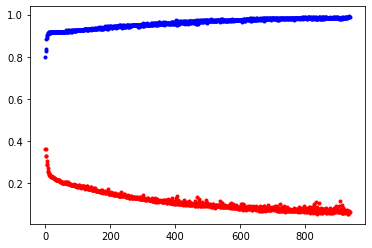

In [76]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
print(len(y_vloss))
x_len = np.arange(len(y_vloss))
plt.plot(x_len,y_vloss,'o',c = 'red', markersize = 3)
plt.plot(x_len,y_acc,'o',c = 'blue', markersize = 3)
plt.show()

In [72]:
model = load_model('./model/this_one838-0.0554.hdf5')

In [75]:
print(model.evaluate(X_test, Y_test))

5/5 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9728
[0.10725834220647812, 0.9727891087532043]


In [73]:
predict = model.predict(X)
print('%.10f' % predict[3])

0.0000289860


In [78]:
count = 0
for index, wine in enumerate(predict):
    if wine > 0.5:
        count+=1
        print(index, "is ", wine)
print(count)

1 is  [0.9999881]
2 is  [0.99977434]
4 is  [0.99998367]
6 is  [0.9318128]
7 is  [0.9999709]
10 is  [0.99993575]
13 is  [0.9999908]
17 is  [0.99114335]
21 is  [0.99998474]
22 is  [0.9999949]
28 is  [0.9999986]
31 is  [0.99999756]
38 is  [0.999997]
40 is  [0.999987]
46 is  [0.99998987]
48 is  [0.9999926]
51 is  [0.9996058]
52 is  [0.9993646]
55 is  [0.99999905]
62 is  [0.7814708]
71 is  [0.9999994]
73 is  [0.87422854]
77 is  [0.99976426]
78 is  [0.57458353]
81 is  [0.9994019]
88 is  [0.99997896]
92 is  [0.9997574]
100 is  [0.9997754]
108 is  [0.61560977]
109 is  [0.9999212]
110 is  [0.9315801]
119 is  [0.99415135]
124 is  [0.99940443]
130 is  [0.9999782]
133 is  [0.9999994]
143 is  [0.6813104]
148 is  [0.99999523]
151 is  [0.999904]
152 is  [0.9999853]
157 is  [0.7217167]
159 is  [0.99999756]
162 is  [0.999976]
163 is  [0.9999944]
166 is  [0.99999523]
171 is  [0.9999222]
172 is  [0.99999857]
174 is  [0.9999801]
176 is  [0.9999938]
178 is  [0.66694003]
183 is  [0.99998045]
187 is  [0.9999